In [171]:
import pandas as pd
import re, string
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Menyiapkan Data Set

In [172]:
df = pd.read_csv('buruh_tweets_202112.csv')
df.head()

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958


## Prepocessing (Case folding, Menghilangkan stopwords, Menghilangkan bahasa slang)

In [173]:
tweet_df = df['tweet']

In [174]:
def case_folding(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = text.rstrip().lstrip()
    text = text.replace('   ',' ')

    return text

In [175]:
def tokenizing(text:str):
    '''
    input : string
    output : list of tokens

    memisahkan kalimat menjadi token token kata dan dimasukkan ke dalam sebuah list
    '''
    text_tokens = word_tokenize(text)
    return(text_tokens)

In [193]:
def remove_stopwords(text:str):
    stopwords_engine = StopWordRemoverFactory()
    stopwords = stopwords_engine.get_stop_words()
    more_stopwords = ['yg', 'cnnindonesia','di'] # menambahkan stopwords
    
    result = []
    for word in text:
        if word not in stopwords + more_stopwords:
        # if word not in stopwords:
            result.append(word)
    return result 

In [194]:
def stemming(text:string):
    '''
    input: string
    output: string

    mengubah bentuk dasar pada kalimat
    '''
    
    engine = StemmerFactory()
    stemmer = engine.create_stemmer()
    text = stemmer.stem(text)

    return text

In [195]:
kalimat = 'Perkembangan kuliner di indonesia cukup membanggakan dalam 10 tahun terakhir'

kalimat = case_folding(kalimat)
kalimat = tokenizing(kalimat)
kalimat = remove_stopwords(kalimat)
kalimat = stemming(' '.join(kalimat))

print(kalimat)

kembang kuliner indonesia bangga tahun


In [196]:
output=[]

for text in tweet_df:
    text = case_folding(text)
    text = tokenizing(text)
    text = remove_stopwords(text)
    text = stemming(' '.join(text))
    output.append(text)

In [197]:
clean_tweet = pd.DataFrame(data=output, columns=['tweet'])
clean_tweet.head()

,tweet
0,sesuai sepakat buruh tangerang raya tolak teta...
1,resty demo buruh jubel izinmakin terang benderang
2,demo buruh rentan tunggang provokator httpstco...
3,geloraco buruh pp kemarin demo gak tuh pasal p...
4,beri buruh upah kering keringat hr abu yula


## Data Processing - Text Data Analysis

In [198]:
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
import nltk

In [199]:
clean_tweet['userid'] = df['userid']
clean_tweet

,tweet,userid
0,sesuai sepakat buruh tangerang raya tolak teta...,58880688
1,resty demo buruh jubel izinmakin terang benderang,1330047738541694978
2,demo buruh rentan tunggang provokator httpstco...,1213739491384426497
3,geloraco buruh pp kemarin demo gak tuh pasal p...,930191748688592896
4,beri buruh upah kering keringat hr abu yula,62988958
...,...,...
995,kalo buruh bicara jiwa kalo gaji potong httpst...,1021329195329179648
996,coferenigus rahmatsubekti buruhyogyakarta buruh,112568246
997,buruh suruh jiwa httpstcopgotdev,1319636205424709632
998,emersonyuntho hehee buya upah bahlil buruh uan...,1360582811921485826


### Distribusi Frekuensi Jumlah Karakter per tweet

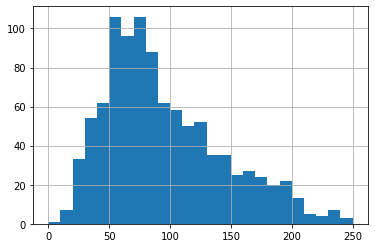

In [200]:
bin_range = np.arange(0, 260, 10)
clean_tweet['tweet'].str.len().hist(bins=bin_range)
plt.show()

### Distribusi Frekuensi Jumlah Kata per tweet

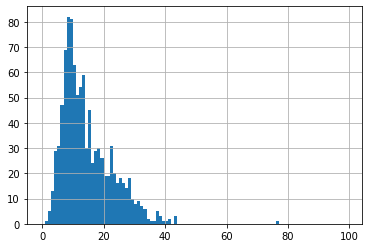

In [201]:
bin_range = np.arange(0, 100)
clean_tweet['tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

### Distribusi Frekuensi Panjang Kata Rata-Rata Pada tweet

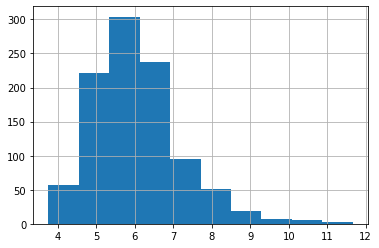

In [202]:
clean_tweet['tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

### Distribusi kata yang sering muncul

In [203]:
# Pertama kita lakukan tokenization pada dataset kita

new_clean_tweet = clean_tweet['tweet'].apply(lambda x: word_tokenize(str(x)))

In [204]:
# masukkan pada semua token tersebut pada satu list yang sama

tweets = [word for tweet in new_clean_tweet for word in tweet]

In [205]:
fqdist = FreqDist(tweets)
print(fqdist)

<FreqDist with 4403 samples and 14171 outcomes>


In [206]:
# Untuk mengetahui kata dan jumlah dari masing-masing kata kita bisa menggunakan.

most_common_word = fqdist.most_common(20)
print(most_common_word)

[('buruh', 1125), ('demo', 231), ('gaji', 204), ('upah', 167), ('jiwa', 106), ('umk', 103), ('usaha', 98), ('naik', 82), ('aksi', 76), ('tinggi', 76), ('gak', 73), ('aja', 73), ('tuntut', 72), ('ga', 68), ('hidup', 63), ('jabat', 60), ('ump', 58), ('pabrik', 58), ('kerja', 53), ('bahlil', 50)]


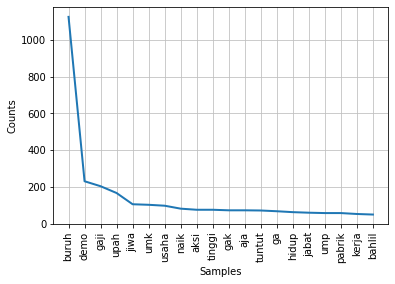

In [207]:
# Visualisasi

fqdist.plot(20,cumulative=False)
plt.show()

### Distribusi N-Gram

In [208]:
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]

In [214]:
result

(demo, buruh)         100
(buruh, demo)          50
(buruh, pabrik)        36
(upah, tinggi)         33
(buruh, jiwa)          30
(upah, buruh)          28
(serikat, buruh)       27
(tuntut, upah)         25
(kaum, buruh)          24
(naik, upah)           22
(gaji, buruh)          21
(jiwa, tuntut)         18
(buruh, tuntut)        17
(upah, minimum)        17
(buruh, gaji)          16
(tetap, ump)           16
(buruh, tani)          16
(umk, buruh)           15
(naik, ump)            15
(buruh, indonesia)     15
dtype: int64